In [691]:
import pandas as pd



In [692]:
df=pd.read_excel("premiums.xlsx")
df

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111
49996,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076
49997,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,Bronze,8564
49998,18,Male,Northwest,Unmarried,2,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,Bronze,9490


In [693]:
df.shape


(50000, 13)

In [694]:
df.columns.str.replace(' ','_').str.lower
df.head(1)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053


In [695]:
df.head(1)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053


In [696]:
df.columns.str.replace('Number Of Dependants','No_of_dependents')

Index(['Age', 'Gender', 'Region', 'Marital_status', 'No_of_dependents',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [697]:
df.columns.str.replace('Medical History','Medical_history')

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical_history', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [698]:
df.head(5)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


Handling N/A Values

In [699]:
df.isnull().sum()




Age                       0
Gender                    0
Region                    0
Marital_status            0
Number Of Dependants      0
BMI_Category              0
Smoking_Status           11
Employment_Status         2
Income_Level             13
Income_Lakhs              0
Medical History           0
Insurance_Plan            0
Annual_Premium_Amount     0
dtype: int64

In [700]:
df.dropna(inplace=True)


In [701]:
df.shape

(49976, 13)

In [702]:
df.isnull().sum()

Age                      0
Gender                   0
Region                   0
Marital_status           0
Number Of Dependants     0
BMI_Category             0
Smoking_Status           0
Employment_Status        0
Income_Level             0
Income_Lakhs             0
Medical History          0
Insurance_Plan           0
Annual_Premium_Amount    0
dtype: int64

In [703]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [704]:
df.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


outliers in no.of dependencies

In [705]:
a=df[df['Number Of Dependants']<0]
a.shape



(72, 13)

In [706]:
df['Number Of Dependants']=abs(df['Number Of Dependants'])

In [707]:
b=df[df['Number Of Dependants']<0]
b.shape

(0, 13)

In [708]:
df['Number Of Dependants'].describe()

count    49976.000000
mean         1.717284
std          1.491953
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Number Of Dependants, dtype: float64

In [709]:
df.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.717284,23.021150,15766.810189
std,15.000378,1.491953,24.221794,8419.995271
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [710]:
numeric_columns=df.select_dtypes(['Float64','Int64']).columns
numeric_columns

Index(['Age', 'Number Of Dependants', 'Income_Lakhs', 'Annual_Premium_Amount'], dtype='object')

In [711]:
import seaborn as sns
import matplotlib.pyplot as plt



In [712]:
numeric_columns

Index(['Age', 'Number Of Dependants', 'Income_Lakhs', 'Annual_Premium_Amount'], dtype='object')

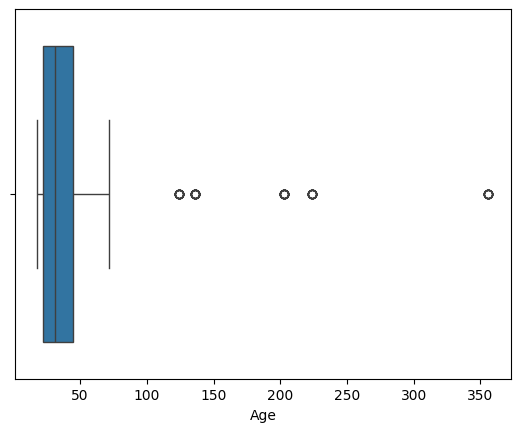

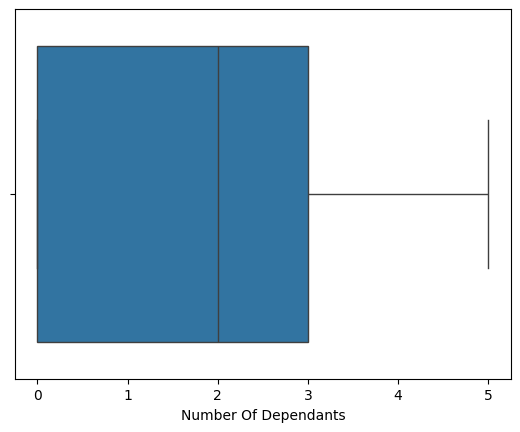

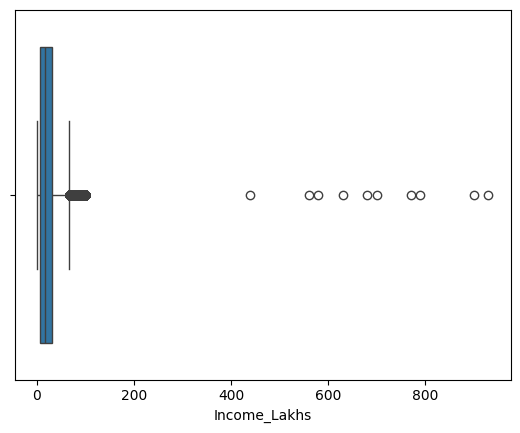

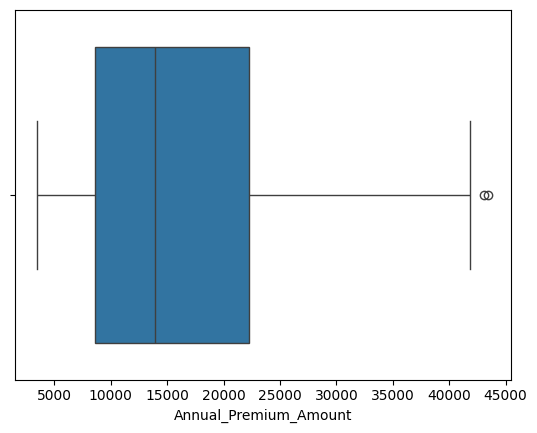

In [713]:
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [714]:
df[df.Age>100]['Age'].unique()

array([224, 124, 136, 203, 356])

In [715]:
df1=df[df.Age<100].copy()


In [716]:
df1.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


In [717]:
quantile_threshold=df1.Income_Lakhs.quantile(0.999)
quantile_threshold

np.float64(100.0)

In [718]:
df2=df1[df1.Income_Lakhs<=quantile_threshold].copy()


In [719]:
df2.Income_Lakhs.describe()

count    49908.000000
mean        22.889897
std         22.170699
min          1.000000
25%          7.000000
50%         17.000000
75%         31.000000
max        100.000000
Name: Income_Lakhs, dtype: float64

In [720]:
df2.shape

(49908, 13)

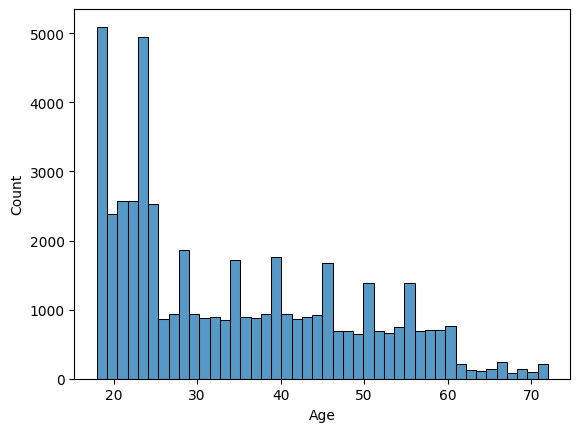

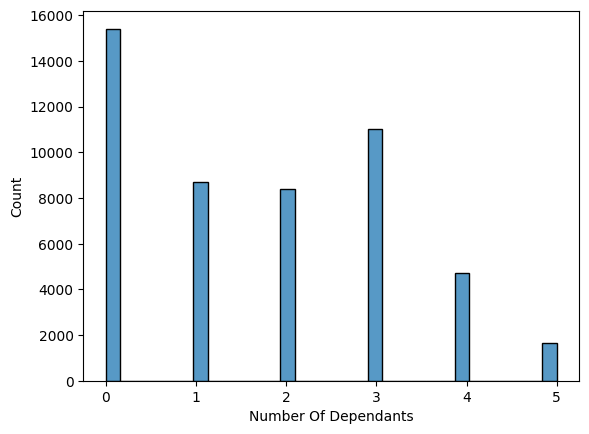

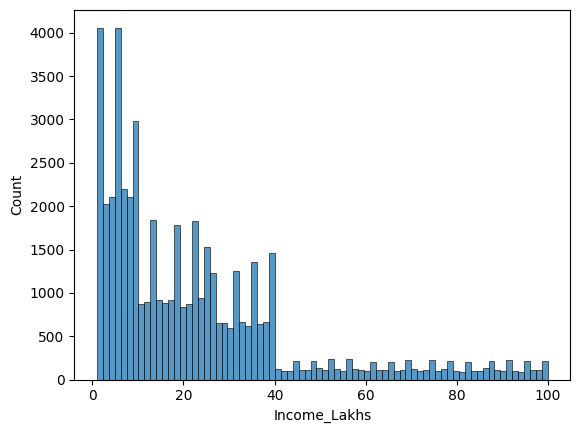

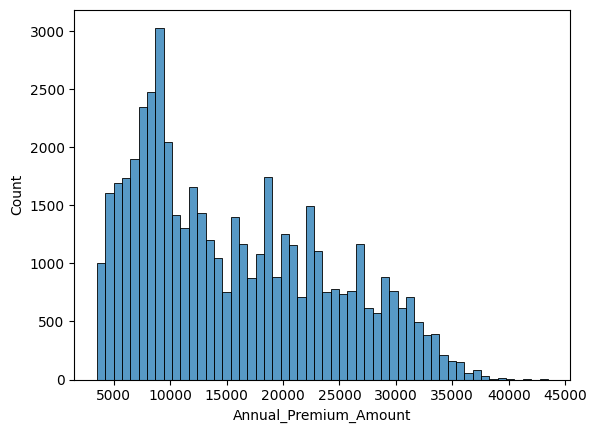

In [721]:
for col in numeric_columns:
    sns.histplot(df2[col])
    plt.show()

In [722]:
df2.head(1)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053


<Axes: xlabel='Age', ylabel='Annual_Premium_Amount'>

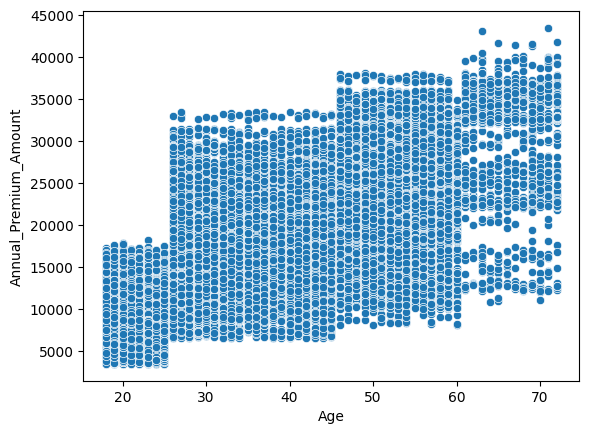

In [723]:
sns.scatterplot(df2,x='Age',y='Annual_Premium_Amount')

In [724]:
numeric_columns

Index(['Age', 'Number Of Dependants', 'Income_Lakhs', 'Annual_Premium_Amount'], dtype='object')

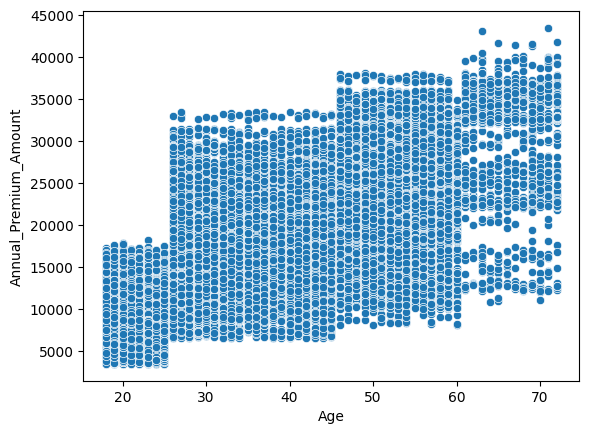

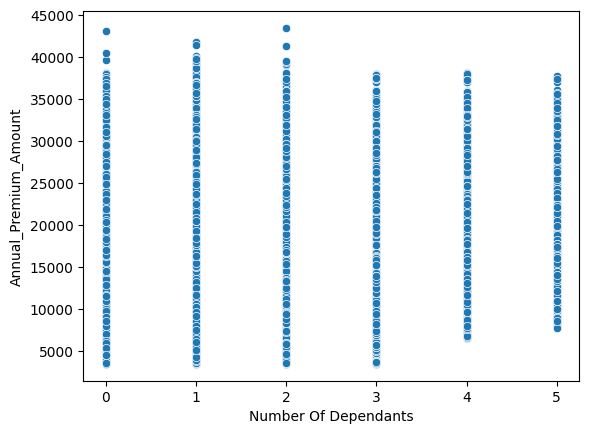

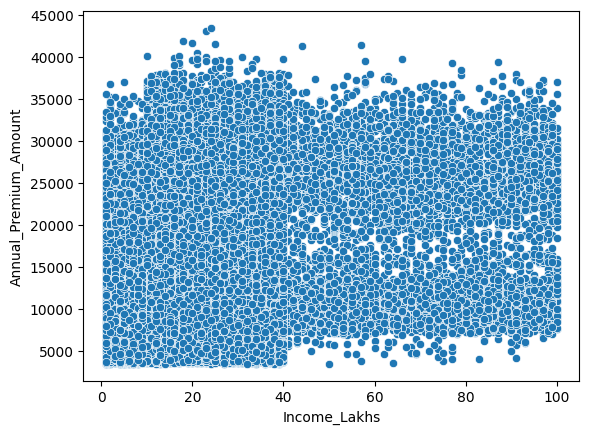

In [725]:

numeric_features=['Age', 'Number Of Dependants', 'Income_Lakhs']
for col in numeric_features:
    sns.scatterplot(df2,x=col,y=df2['Annual_Premium_Amount'])
    plt.show()


In [726]:
df2.head(5)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [727]:
df2.head(1)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053


In [728]:
categorial_columns=['Gender','Region','Marital_status','BMI_Category','Smoking_Status','Employment_Status','Income_Level','Medical History','Insurance_Plan']
for col in categorial_columns:
    print(col,": ",df2[col].unique())

Gender :  ['Male' 'Female']
Region :  ['Northwest' 'Southeast' 'Northeast' 'Southwest']
Marital_status :  ['Unmarried' 'Married']
BMI_Category :  ['Normal' 'Obesity' 'Overweight' 'Underweight']
Smoking_Status :  ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
Employment_Status :  ['Salaried' 'Self-Employed' 'Freelancer']
Income_Level :  ['<10L' '10L - 25L' '> 40L' '25L - 40L']
Medical History :  ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
Insurance_Plan :  ['Bronze' 'Silver' 'Gold']


In [729]:
df2['Smoking_Status'].replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking'
    
},inplace=True)

/var/folders/qq/hz97qkm52cxb4wthmb24ntsm0000gn/T/ipykernel_55627/3055924117.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Smoking_Status'].replace({


In [730]:
categorial_columns=['Gender','Region','Marital_status','BMI_Category','Smoking_Status','Employment_Status','Income_Level','Medical History','Insurance_Plan']
for col in categorial_columns:
    print(col,": ",df2[col].unique())

Gender :  ['Male' 'Female']
Region :  ['Northwest' 'Southeast' 'Northeast' 'Southwest']
Marital_status :  ['Unmarried' 'Married']
BMI_Category :  ['Normal' 'Obesity' 'Overweight' 'Underweight']
Smoking_Status :  ['No Smoking' 'Regular' 'Occasional']
Employment_Status :  ['Salaried' 'Self-Employed' 'Freelancer']
Income_Level :  ['<10L' '10L - 25L' '> 40L' '25L - 40L']
Medical History :  ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
Insurance_Plan :  ['Bronze' 'Silver' 'Gold']


In [731]:
pct_count=df2['Gender'].value_counts(normalize=True)


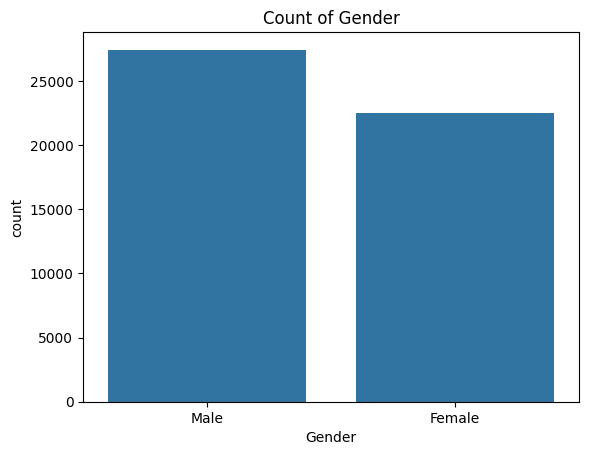

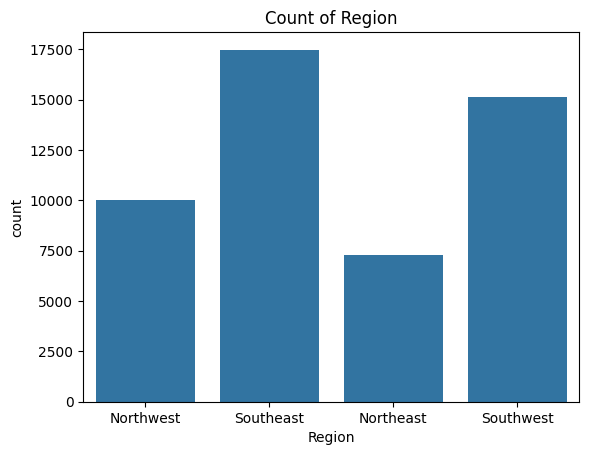

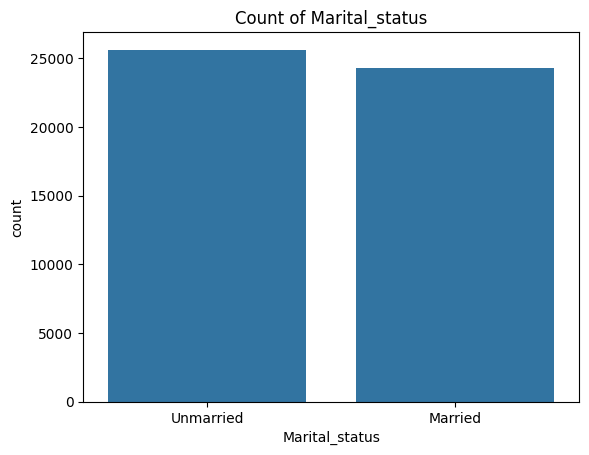

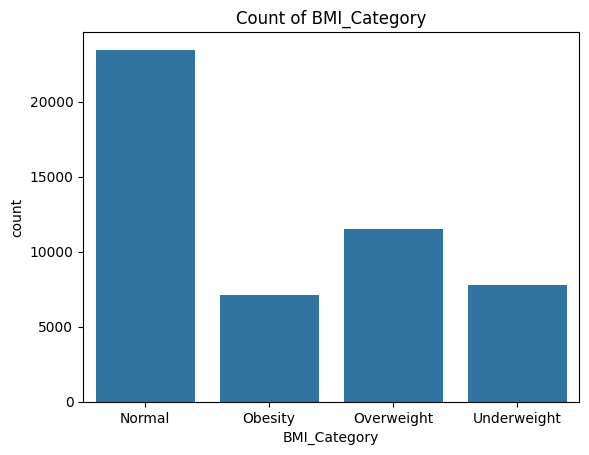

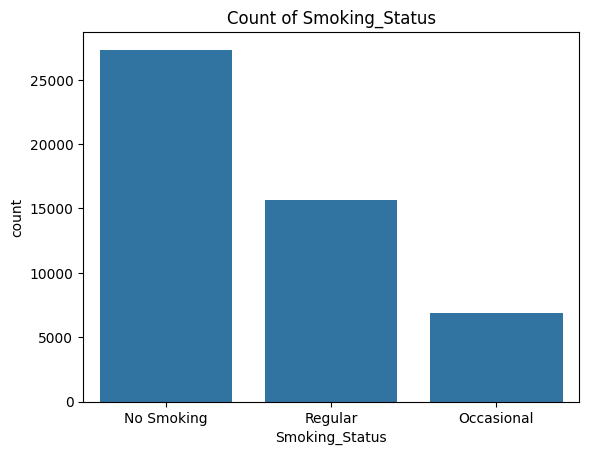

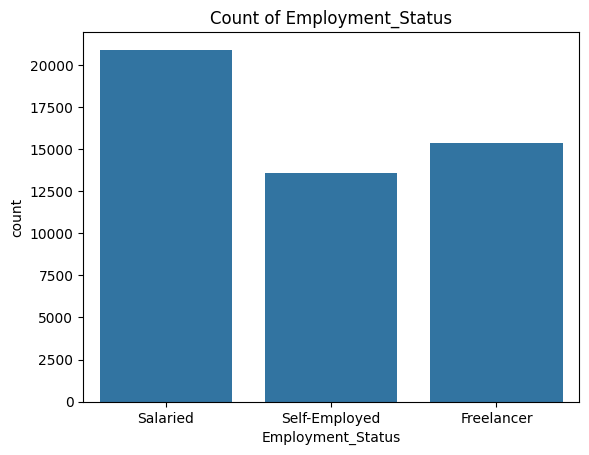

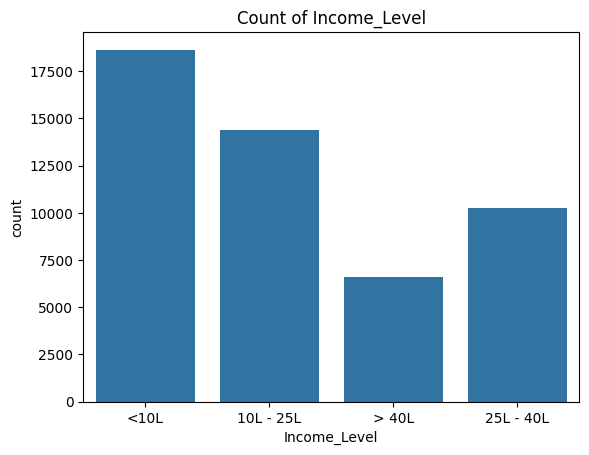

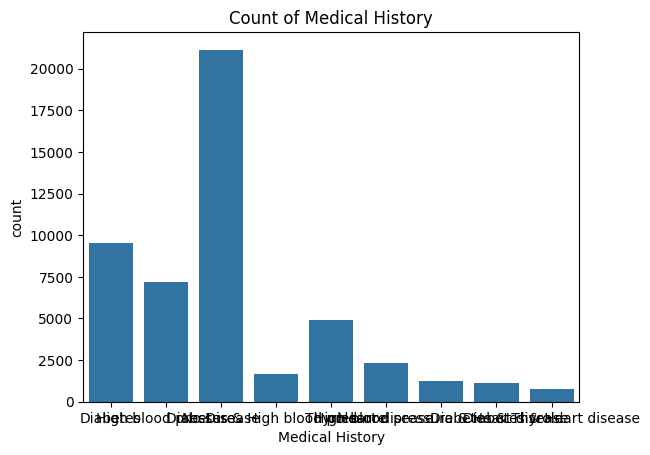

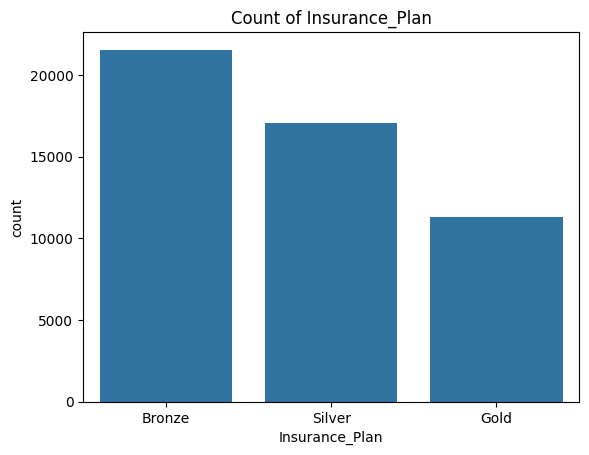

In [732]:
for i in categorial_columns:
    sns.countplot(data=df2, x=i)
    plt.title(f"Count of {i}")
    plt.show()



FEATURE ENGINEERING

In [733]:
df2.sample(1)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
12300,21,Female,Northeast,Unmarried,1,Normal,No Smoking,Freelancer,25L - 40L,39,No Disease,Bronze,6552


In [734]:
df2['Medical History'].unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [735]:
risk_score={
    'diabetes': 6,
    'heart disease' : 8,
    'thyroid': 5,
    'no disease': 0,
    'none': 0
}

In [736]:
df2[['disease1','disease2']]=df2['Medical History'].str.split("&",expand=True).apply(lambda x:x.str.lower())

In [737]:
df2['disease1'].fillna('none',inplace=True)
df2['disease2'].fillna('none',inplace=True)
df2['total_risk_score']=0


for disease in ['disease1','disease2']:
    df2['total_risk_score']+=df2[disease].map(risk_score)


max_score=df2['total_risk_score'].max()
min_score=df2['total_risk_score'].min()
df2['normalized_score']= (df2['total_risk_score']-min_score)/(max_score-min_score)
df2.head(5)

/var/folders/qq/hz97qkm52cxb4wthmb24ntsm0000gn/T/ipykernel_55627/1908823310.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none',inplace=True)
/var/folders/qq/hz97qkm52cxb4wthmb24ntsm0000gn/T/ipykernel_55627/1908823310.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,disease1,disease2,total_risk_score,normalized_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6.0,0.75
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6.0,0.75
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,NaN,NaN
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0.0,0.00
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,NaN,NaN


In [738]:
df2

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,disease1,disease2,total_risk_score,normalized_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6.0,0.750
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6.0,0.750
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,NaN,NaN
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0.0,0.000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111,no disease,none,0.0,0.000
49996,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076,thyroid,none,5.0,0.625
49997,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,Bronze,8564,no disease,none,0.0,0.000
49998,18,Male,Northwest,Unmarried,2,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,Bronze,9490,no disease,none,0.0,0.000


In [739]:
df2['total_risk_score'].fillna('0.0',inplace=True)

/var/folders/qq/hz97qkm52cxb4wthmb24ntsm0000gn/T/ipykernel_55627/939485161.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['total_risk_score'].fillna('0.0',inplace=True)
/var/folders/qq/hz97qkm52cxb4wthmb24ntsm0000gn/T/ipykernel_55627/939485161.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2['total_risk_score'].fillna('0.0',inplace=Tru

In [740]:
df2.sample(5)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,disease1,disease2,total_risk_score,normalized_score
6961,21,Female,Northeast,Unmarried,0,Normal,No Smoking,Salaried,<10L,7,Diabetes,Bronze,9658,diabetes,none,6.0,0.750
4318,18,Male,Northwest,Unmarried,1,Underweight,Regular,Freelancer,<10L,1,No Disease,Bronze,4858,no disease,none,0.0,0.000
1031,38,Female,Northeast,Married,3,Overweight,No Smoking,Self-Employed,<10L,9,High blood pressure & Heart disease,Bronze,14823,high blood pressure,heart disease,0.0,NaN
28847,53,Female,Southeast,Married,4,Normal,No Smoking,Salaried,<10L,5,Thyroid,Silver,18763,thyroid,none,5.0,0.625
26599,27,Female,Southeast,Unmarried,2,Obesity,No Smoking,Self-Employed,25L - 40L,33,Diabetes & Heart disease,Silver,23817,diabetes,heart disease,0.0,NaN


In [741]:
df2['Insurance_Plan']=df2['Insurance_Plan'].map({'Bronze':1,'Silver': 2,'Gold':3})

In [742]:
df2

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,disease1,disease2,total_risk_score,normalized_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,1,9053,diabetes,none,6.0,0.750
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,1,16339,diabetes,none,6.0,0.750
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,2,18164,high blood pressure,none,0.0,NaN
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,3,20303,no disease,none,0.0,0.000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,2,13365,high blood pressure,none,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,1,9111,no disease,none,0.0,0.000
49996,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,3,27076,thyroid,none,5.0,0.625
49997,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,1,8564,no disease,none,0.0,0.000
49998,18,Male,Northwest,Unmarried,2,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,1,9490,no disease,none,0.0,0.000


In [743]:
df2['Income_Level']=df2['Income_Level'].map({'<10L':1,'10L - 25L':2,'25L - 40L':3,'> 40L':4})

In [744]:
df2.sample(5)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,disease1,disease2,total_risk_score,normalized_score
3117,18,Male,Northwest,Unmarried,0,Underweight,No Smoking,Salaried,3,34,No Disease,1,5873,no disease,none,0.0,0.00
17238,29,Female,Southeast,Unmarried,0,Overweight,Regular,Salaried,1,9,Diabetes,1,14300,diabetes,none,6.0,0.75
40925,45,Female,Southeast,Unmarried,1,Normal,No Smoking,Freelancer,1,3,High blood pressure,1,8962,high blood pressure,none,0.0,NaN
35337,46,Male,Southeast,Unmarried,0,Normal,No Smoking,Salaried,1,3,No Disease,2,16700,no disease,none,0.0,0.00
25773,23,Male,Northeast,Unmarried,1,Normal,No Smoking,Freelancer,1,6,No Disease,1,5652,no disease,none,0.0,0.00


In [745]:
nominal_columns=['Gender','Region','Marital_status','BMI_Category','Smoking_Status','Employment_Status']
df3=pd.get_dummies(df2,columns=nominal_columns,dtype=int,drop_first=True)

In [746]:
df3.sample(5)

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,disease1,disease2,total_risk_score,...,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
22558,40,3,2,24,Diabetes & Thyroid,3,27587,diabetes,thyroid,0.0,...,1,0,0,1,0,0,0,0,1,0
24730,20,0,3,37,No Disease,2,12402,no disease,none,0.0,...,0,1,1,0,0,0,0,0,0,0
24418,43,4,4,50,Thyroid,3,25310,thyroid,none,5.0,...,1,0,0,0,0,0,0,1,0,0
22916,18,3,2,10,No Disease,2,8042,no disease,none,0.0,...,0,1,0,0,0,1,0,0,0,0
34806,24,0,2,13,No Disease,1,9059,no disease,none,0.0,...,1,0,1,0,0,0,0,1,1,0


In [747]:
#deleting of unnecessary columns from the data set which doesnt inpact in the model training
df4=df3.drop(['Medical History','disease1','disease2','total_risk_score'],axis=1)


In [748]:
df4

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Insurance_Plan,Annual_Premium_Amount,normalized_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
0,26,0,1,6,1,9053,0.750,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.750,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,NaN,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.000,0,0,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,2,13365,NaN,1,0,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,24,0,3,35,1,9111,0.000,0,1,0,0,1,0,0,1,0,0,0,1
49996,47,2,4,82,3,27076,0.625,0,0,1,0,0,0,0,0,0,0,1,0
49997,21,0,3,32,1,8564,0.000,1,1,0,0,1,0,0,0,0,1,0,0
49998,18,2,2,20,1,9490,0.000,1,1,0,0,1,0,0,0,0,0,1,0


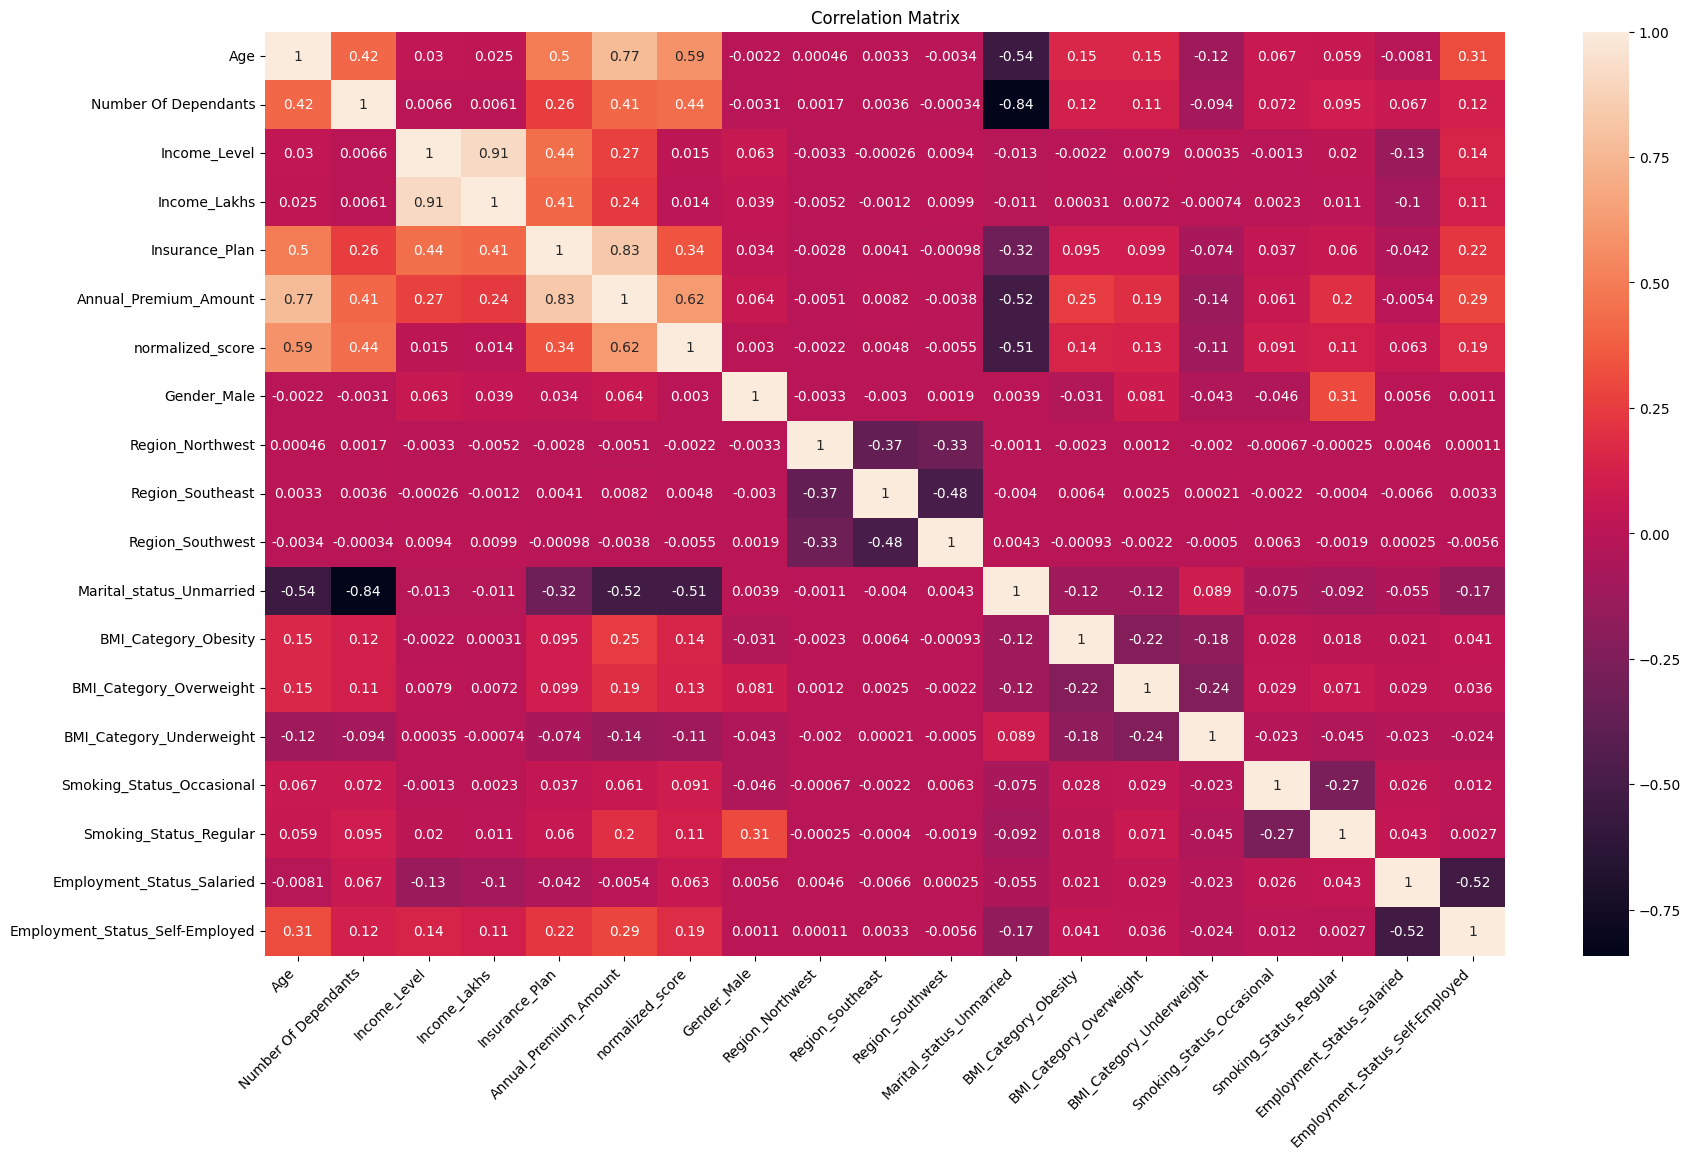

In [749]:
cm = df4.corr()

plt.figure(figsize=(20, 12))  
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix")
plt.tight_layout
plt.show()

In [750]:
df4.sample(5)

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Insurance_Plan,Annual_Premium_Amount,normalized_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
2189,44,0,2,19,2,24680,1.0,1,0,0,1,1,0,1,0,0,1,0,1
16908,21,0,1,8,1,4699,0.0,0,0,0,1,1,0,1,0,0,0,0,0
20867,52,5,2,15,3,31759,NaN,1,0,0,1,0,0,1,0,0,1,0,1
37937,18,0,4,50,2,8418,0.0,0,1,0,0,1,0,0,1,0,0,1,0
3818,23,0,4,100,2,12422,0.0,0,0,1,0,1,0,0,1,0,0,1,0


In [751]:
df4 #final dataframe

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Insurance_Plan,Annual_Premium_Amount,normalized_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
0,26,0,1,6,1,9053,0.750,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.750,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,NaN,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.000,0,0,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,2,13365,NaN,1,0,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,24,0,3,35,1,9111,0.000,0,1,0,0,1,0,0,1,0,0,0,1
49996,47,2,4,82,3,27076,0.625,0,0,1,0,0,0,0,0,0,0,1,0
49997,21,0,3,32,1,8564,0.000,1,1,0,0,1,0,0,0,0,1,0,0
49998,18,2,2,20,1,9490,0.000,1,1,0,0,1,0,0,0,0,0,1,0


In [752]:
X=df4.drop('Annual_Premium_Amount',axis=1)
y=df4['Annual_Premium_Amount']


In [753]:
df4.head(1)

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Insurance_Plan,Annual_Premium_Amount,normalized_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
0,26,0,1,6,1,9053,0.75,1,1,0,0,1,0,0,0,0,0,1,0


In [754]:
#scaling the large values 


from sklearn.preprocessing import MinMaxScaler
cols_to_scale=['Age','Number Of Dependants','Income_Level','Income_Lakhs']
scalar=MinMaxScaler()



X[cols_to_scale]=scalar.fit_transform(X[cols_to_scale])

In [755]:
X.head(2)

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Insurance_Plan,normalized_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
0,0.148148,0.0,0.0,0.050505,1,0.75,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.0,0.050505,1,0.75,0,0,1,0,0,1,0,0,0,1,1,0


In [756]:
X.describe()

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Insurance_Plan,normalized_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,37931.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,0.303733,0.343528,0.365900,0.221110,1.794802,0.331282,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,0.253363,0.298406,0.349711,0.223946,0.784919,0.379516,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.060606,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.161616,2.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.303030,2.000000,0.750000,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [757]:
X_modified=X.drop('Income_Level',axis=1)

In [758]:
X_modified.head(5)

,Age,Number Of Dependants,Income_Lakhs,Insurance_Plan,normalized_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
0,0.148148,0.0,0.050505,1,0.75,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.050505,1,0.75,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.191919,2,NaN,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,0.767677,3,0.00,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,0.989899,2,NaN,1,0,0,0,1,0,1,0,0,1,0,1


In [759]:
#model training data
X_modified
y

0         9053
1        16339
2        18164
3        20303
4        13365
         ...  
49995     9111
49996    27076
49997     8564
49998     9490
49999    19730
Name: Annual_Premium_Amount, Length: 49908, dtype: int64

MODEL TRAINING

In [760]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [764]:
X_train,X_test,y_train,y_test=train_test_split(X_modified,y,test_size=0.3,random_state=33)


In [762]:
print("x_train : ",X_train.shape)
print("x_test : ",X_test.shape)
print("y_test : ",y_test.shape)
print("y_train : ",y_train.shape)

x_train :  (34935, 17)
x_test :  (14973, 17)
y_test :  (14973,)
y_train :  (34935,)


In [765]:
X_test.isnull().sum()



Age                                   0
Number Of Dependants                  0
Income_Lakhs                          0
Insurance_Plan                        0
normalized_score                   3607
Gender_Male                           0
Region_Northwest                      0
Region_Southeast                      0
Region_Southwest                      0
Marital_status_Unmarried              0
BMI_Category_Obesity                  0
BMI_Category_Overweight               0
BMI_Category_Underweight              0
Smoking_Status_Occasional             0
Smoking_Status_Regular                0
Employment_Status_Salaried            0
Employment_Status_Self-Employed       0
dtype: int64

In [766]:
X_test['normalized_score'].fillna(0.000)

24255    0.750
28471    0.000
47740    0.625
3601     0.000
15035    0.000
         ...  
28760    0.000
10264    0.000
38523    0.000
3973     0.000
3163     0.750
Name: normalized_score, Length: 14973, dtype: float64

In [767]:
X_test

,Age,Number Of Dependants,Income_Lakhs,Insurance_Plan,normalized_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
24255,0.425926,0.4,0.272727,2,0.750,0,0,0,1,0,0,0,0,0,0,0,1
28471,0.277778,0.6,0.101010,2,NaN,1,0,1,0,0,0,0,0,0,1,1,0
47740,0.296296,0.0,0.282828,2,0.625,0,0,0,0,1,0,0,0,0,0,0,1
3601,0.129630,0.0,0.323232,1,0.000,0,0,0,1,1,0,0,1,0,1,0,1
15035,0.537037,0.4,0.000000,1,0.000,0,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28760,0.222222,0.4,0.030303,2,NaN,0,0,0,1,0,0,0,1,0,1,1,0
10264,0.018519,0.2,0.212121,1,0.000,1,0,0,1,1,0,1,0,0,0,1,0
38523,0.148148,0.2,0.272727,2,NaN,1,0,0,0,1,0,0,0,0,0,1,0
3973,0.185185,0.0,0.121212,2,0.000,1,0,1,0,1,0,0,0,0,0,1,0


In [772]:
model_lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [771]:
X_train.isna().sum()


Age                                0
Number Of Dependants               0
Income_Lakhs                       0
Insurance_Plan                     0
normalized_score                   0
Gender_Male                        0
Region_Northwest                   0
Region_Southeast                   0
Region_Southwest                   0
Marital_status_Unmarried           0
BMI_Category_Obesity               0
BMI_Category_Overweight            0
BMI_Category_Underweight           0
Smoking_Status_Occasional          0
Smoking_Status_Regular             0
Employment_Status_Salaried         0
Employment_Status_Self-Employed    0
dtype: int64

In [ ]:
#linear regression

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
training_score=model_lr.score(X_train,y_train)
testing_score=model_lr.score(X_test,y_test)
print(training_score,testing_score)


0.9117630426010942 0.9110883598190634


In [779]:
X_test.columns

Index(['Age', 'Number Of Dependants', 'Income_Lakhs', 'Insurance_Plan',
       'normalized_score', 'Gender_Male', 'Region_Northwest',
       'Region_Southeast', 'Region_Southwest', 'Marital_status_Unmarried',
       'BMI_Category_Obesity', 'BMI_Category_Overweight',
       'BMI_Category_Underweight', 'Smoking_Status_Occasional',
       'Smoking_Status_Regular', 'Employment_Status_Salaried',
       'Employment_Status_Self-Employed'],
      dtype='object')

In [777]:
model_lr.coef_

array([12188.01457989,  -390.47013615,  -416.72074696,  6299.98893543,
        1486.59479584,    78.31022645,   -76.53483615,    35.48964607,
         -17.11962832, -1355.82752114,  3386.82337196,  1672.0645465 ,
         273.82817469,   831.38979918,  2364.90981723,   260.94199124,
         424.26049369])

In [778]:
model_lr.intercept_

np.float64(-728.7580835574408)

In [794]:
feature_importance=model_lr.coef_
coeff_df=pd.DataFrame(feature_importance,index=X_test.columns,columns=['coefficents'])
sorted_coeff_df=coeff_df.sort_values(by='coefficents',ascending=False)

<function matplotlib.pyplot.show(close=None, block=None)>

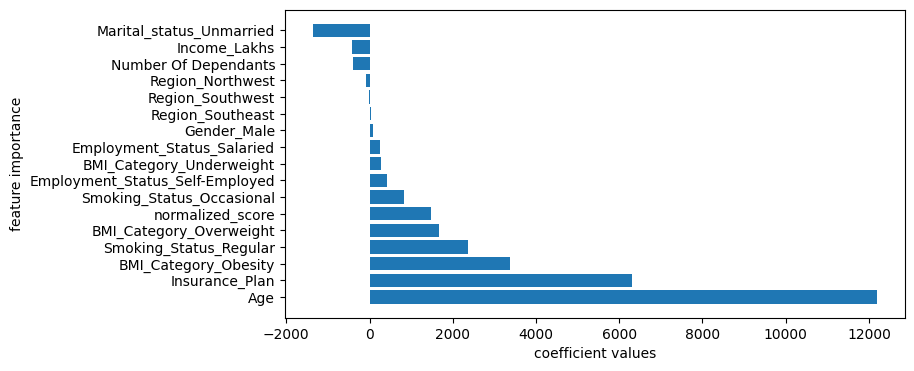

In [795]:
plt.figure(figsize=(8, 4))
plt.barh(sorted_coeff_df.index,sorted_coeff_df['coefficents'])
plt.xlabel('coefficient values')
plt.ylabel('feature importance')
plt.show

In [ ]:
#ridge regression
from sklearn.linear_model import Ridge
model_ridge=Ridge()
model_ridge.fit(X_train,y_train)
training_score=model_ridge.score(X_train,y_train)
testing_score=model_ridge.score(X_test,y_test)
training_score,testing_score

(0.9117629986643773, 0.9110903999471801)

In [810]:
!pip uninstall xgboost -y
!pip install xgboost --no-cache-dir




Found existing installation: xgboost 3.1.0
Uninstalling xgboost-3.1.0:
  Successfully uninstalled xgboost-3.1.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.2 MB/s eta 0:00:00 0:00:01


In [815]:
#xgboost

from xgboost import XGBRegressor
model_xgb=XGBRegressor()
model_xgb.fit(X_train,y_train)
training_score=model_ridge.score(X_train,y_train)
testing_score=model_ridge.score(X_test,y_test)
training_score,testing_score


(0.9117629986643773, 0.9110903999471801)

In [816]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define model
model_xgb = XGBRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [20, 40, 50],        # ✅ correct name: n_estimators
    'learning_rate': [0.01, 0.1, 0.2],   # ✅ correct name: learning_rate
    'max_depth': [3, 4, 5]
}

# Define Randomized Search
random_search = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=param_grid,
    n_iter=10,            # number of random combinations to try
    scoring='r2',        # metric to evaluate
    cv=3,                # 3-fold cross-validation
    verbose=2,
    random_state=42,
            
)

# Fit on training data
random_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best R2 Score:", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=40; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=40; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=40; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.2, max_depth=4, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.2, max_depth=4, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.2, max_depth=4, n_e

In [818]:
best_model=random_search.best_estimator_
best_model

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


<function matplotlib.pyplot.show(close=None, block=None)>

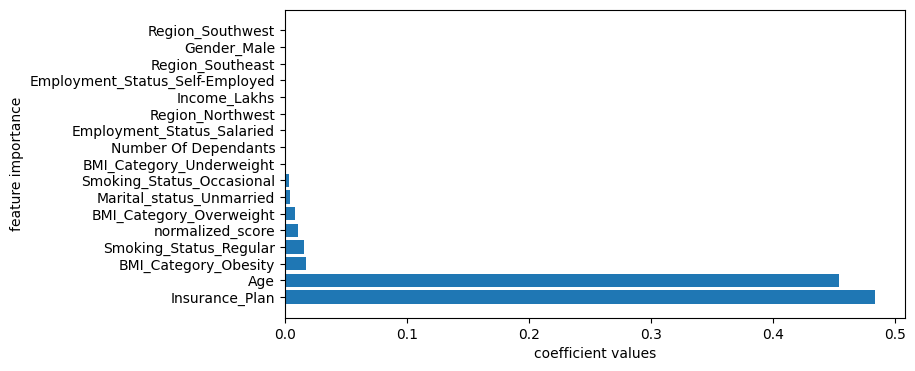

In [819]:
feature_importance=best_model.feature_importances_


coeff_df=pd.DataFrame(feature_importance,index=X_test.columns,columns=['coefficents'])
sorted_coeff_df=coeff_df.sort_values(by='coefficents',ascending=False)
plt.figure(figsize=(8, 4))
plt.barh(sorted_coeff_df.index,sorted_coeff_df['coefficents'])
plt.xlabel('coefficient values')
plt.ylabel('feature importance')
plt.show

#ERROR ANALYSIS

In [823]:
y_pred=best_model.predict(X_test)
residuals=y_pred-y_test
residuals_pct=residuals*100/y_test
result_df=pd.DataFrame({
    'actual' : y_test,
    'predicted' : y_pred,
    'residuals ' : residuals,
    'residuals_pct' : residuals_pct

})


In [826]:
result_df.sample(10)

,actual,predicted,residuals,residuals_pct
43023,24650,24899.312500,249.312500,1.011410
3959,7931,9979.775391,2048.775391,25.832498
34593,4151,6618.648438,2467.648438,59.447084
26938,30373,30213.923828,-159.076172,-0.523742
30179,13467,13309.201172,-157.798828,-1.171744
24065,25506,25184.300781,-321.699219,-1.261269
1114,33281,29395.962891,-3885.037109,-11.673439
41304,9336,9758.654297,422.654297,4.527145
38996,5036,6608.390137,1572.390137,31.222997
4687,7946,6618.648438,-1327.351562,-16.704651


<Axes: xlabel='residuals_pct', ylabel='Count'>

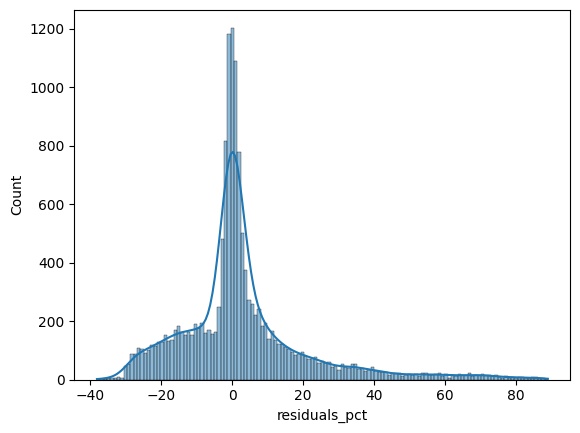

In [825]:
sns.histplot(result_df['residuals_pct'],kde=True)

In [829]:
extreme_threshold=10
extreme_result_df=result_df[np.abs(result_df.residuals_pct)>extreme_threshold]
extreme_result_df.shape

(5877, 4)

In [830]:
result_df

,actual,predicted,residuals,residuals_pct
24255,15457,16233.185547,776.185547,5.021580
28471,20650,19009.503906,-1640.496094,-7.944291
47740,15919,16224.854492,305.854492,1.921317
3601,5912,7301.921875,1389.921875,23.510181
15035,9357,11778.399414,2421.399414,25.877946
...,...,...,...,...
28760,19424,19121.728516,-302.271484,-1.556175
10264,5723,7043.826660,1320.826660,23.079271
38523,15377,16088.072266,711.072266,4.624259
3973,13295,16042.376953,2747.376953,20.664738


In [835]:
result_df

,actual,predicted,residuals,residuals_pct
24255,15457,16233.185547,776.185547,5.021580
28471,20650,19009.503906,-1640.496094,-7.944291
47740,15919,16224.854492,305.854492,1.921317
3601,5912,7301.921875,1389.921875,23.510181
15035,9357,11778.399414,2421.399414,25.877946
...,...,...,...,...
28760,19424,19121.728516,-302.271484,-1.556175
10264,5723,7043.826660,1320.826660,23.079271
38523,15377,16088.072266,711.072266,4.624259
3973,13295,16042.376953,2747.376953,20.664738


In [ ]:
extreme_error_pct=extreme_result_df.shape[0]*100/result_df.shape[0]
extreme_error_pct

39.2506511721098

In [836]:
result_df
extreme_result_df

,actual,predicted,residuals,residuals_pct
3601,5912,7301.921875,1389.921875,23.510181
15035,9357,11778.399414,2421.399414,25.877946
36580,7902,6888.257324,-1013.742676,-12.828938
48530,10038,7216.853027,-2821.146973,-28.104672
37463,8097,9979.775391,1882.775391,23.252753
...,...,...,...,...
20360,9562,7154.453613,-2407.546387,-25.178272
614,11108,9979.775391,-1128.224609,-10.156865
28210,5463,7025.813965,1562.813965,28.607248
10264,5723,7043.826660,1320.826660,23.079271


In [843]:
extreme_result_df.index

Index([ 3601, 15035, 36580, 48530, 37463, 30296, 24964, 20181, 28627, 46253,
       ...
       48727, 38799, 11307,  1283,  1117, 20360,   614, 28210, 10264,  3973],
      dtype='int64', length=5877)

In [848]:
extreme_error_df=X_test.loc[extreme_result_df.index]
extreme_error_df.sample(5)

,Age,Number Of Dependants,Income_Lakhs,Insurance_Plan,normalized_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
2510,0.277778,0.4,0.060606,2,0.0,0,1,0,0,0,0,0,1,1,0,1,0
49362,0.222222,0.6,0.060606,1,0.0,0,0,0,0,0,0,1,0,1,0,0,1
27762,0.055556,0.2,0.000000,1,0.0,1,0,1,0,1,0,0,0,0,0,0,1
1730,0.000000,0.0,0.464646,3,0.0,0,0,0,1,1,1,0,0,0,0,0,1
14653,0.037037,0.2,0.737374,2,0.0,0,1,0,0,1,0,0,0,0,0,0,0


<Axes: xlabel='Age', ylabel='Count'>

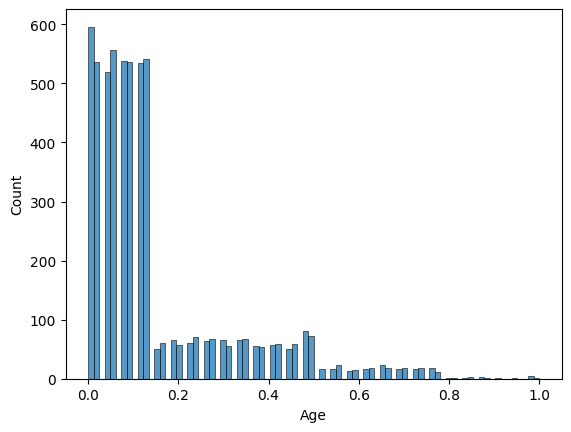

In [850]:
sns.histplot(extreme_error_df.Age)

In [865]:
extreme_error_df['Age'].quantile(0.84)

np.float64(0.3148148148148148)

MODEL SEGMENTATION : where the model is divided into two differnet models because to incresasr the accuracy of the model 

--- In our case we have 85% of the people are less than 30 years of age 

To treat that we will be dividing the data set into two different sets >30 and <=30 years
